## **Data Preprocessing & EDA**
---

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('heart.csv')

# Verify the load by printing the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [6]:
# Check dataset dimensions
print(f"Dataset Shape: {df.shape}")
print("-" * 30)

# Check data types and non-null values
print("Dataset Information:")
df.info()

Dataset Shape: (303, 14)
------------------------------
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [7]:
target_col = 'num'
print(f"Unique values in '{target_col}': {df[target_col].unique()}")

Unique values in 'num': [0 2 1 3 4]


In [8]:
# 1. Handle '?' in 'ca' and 'thal'
# Replace '?' with NaN
df['ca'] = df['ca'].replace('?', np.nan)
df['thal'] = df['thal'].replace('?', np.nan)

# Convert columns to numeric types (float)
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])

# Fill missing values with the Mode (most frequent value)
df.fillna({'ca': df['ca'].mode()[0], 'thal': df['thal'].mode()[0]}, inplace=True)

# 2. Fix Target Variable 'num' to be Binary (0 vs 1)
# 0 = No Disease, 1,2,3,4 = Disease -> Convert all > 0 to 1
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Verify the changes
print("Missing values after cleaning:\n", df.isnull().sum())
print("\nUnique values in target 'num':", df['num'].unique())
print("\nNew Data Types:")
print(df.dtypes)

Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Unique values in target 'num': [0 1]

New Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [9]:
# Statistical Summary
# Transpose (.T) makes it easier to read
print("Statistical Summary of the Dataset:")
display(df.describe().T)

Statistical Summary of the Dataset:


,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


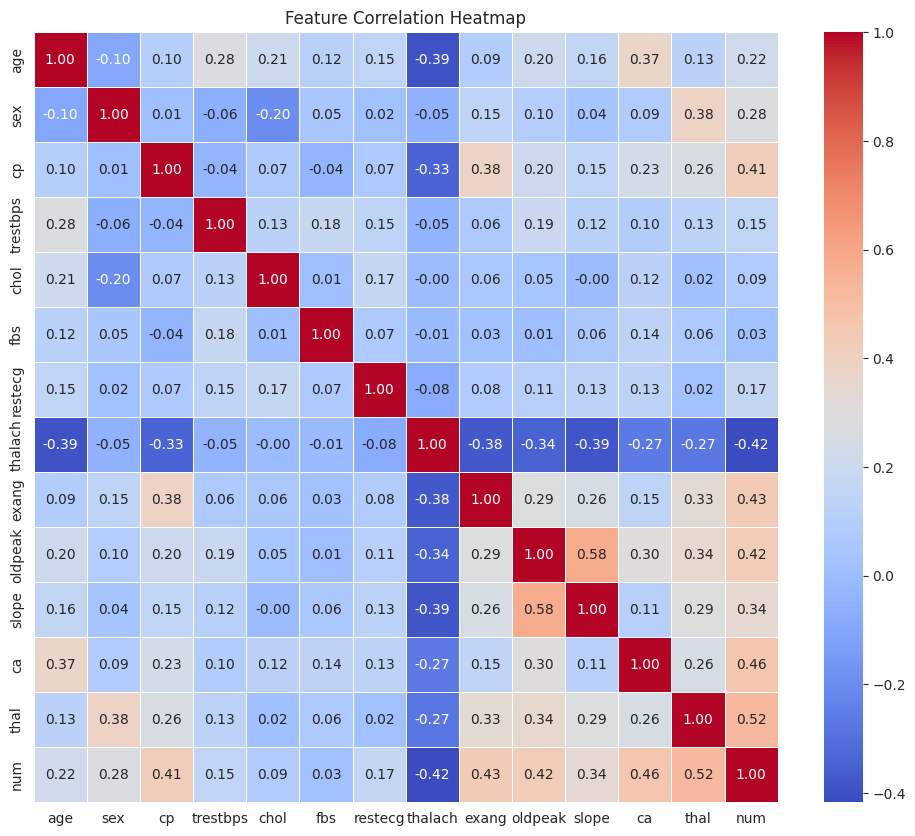

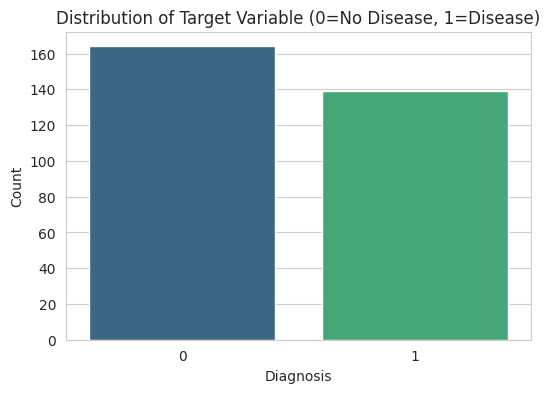

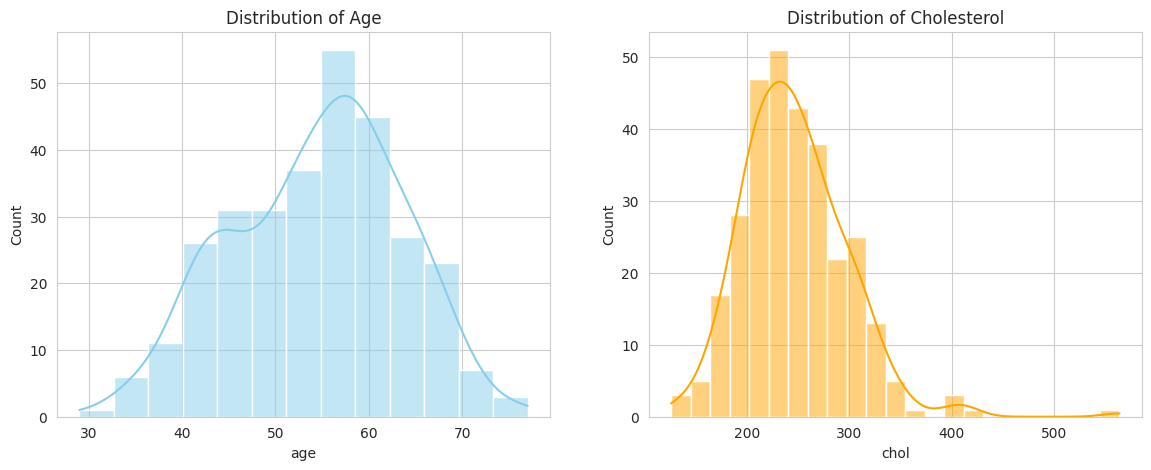

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_style("whitegrid")

# 1. Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df, palette='viridis', hue='num', legend=False)
plt.title("Distribution of Target Variable (0=No Disease, 1=Disease)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

# 3. Histograms for Age and Cholesterol
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['age'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Distribution of Age")

sns.histplot(df['chol'], kde=True, color='orange', ax=axes[1])
axes[1].set_title("Distribution of Cholesterol")

plt.show()

In [11]:
# Select categorical columns with >2 levels for encoding
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verify the new shape (more columns should appear)
print(f"New Dataset Shape after Encoding: {df.shape}")
print("New Columns:", df.columns.tolist())

New Dataset Shape after Encoding: (303, 19)
New Columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'num', 'cp_2', 'cp_3', 'cp_4', 'restecg_1', 'restecg_2', 'slope_2', 'slope_3', 'thal_6.0', 'thal_7.0']


In [12]:
from sklearn.model_selection import train_test_split

# Separate Features (X) and Target (y)
X = df.drop('num', axis=1)
y = df['num']

# Split: 80% Training, 20% Testing
# random_state=42 ensures we get the same split every time we run this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (242, 18)
Testing Data Shape: (61, 18)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training set only, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Feature Scaling Completed.")
print("First 5 rows of Scaled Training Data:")
display(X_train_scaled.head())

Feature Scaling Completed.
First 5 rows of Scaled Training Data:


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2,cp_3,cp_4,restecg_1,restecg_2,slope_2,slope_3,thal_6.0,thal_7.0
0,-0.729485,0.68313,-0.395692,0.458139,-0.411196,0.708371,-0.696177,-0.445445,-0.689715,-0.458258,-0.599625,1.033623,-0.064416,1.025109,1.095445,-0.266076,-0.218218,1.243933
1,0.050166,0.68313,-0.054513,0.230598,-0.411196,0.222495,-0.696177,-0.891627,-0.689715,2.182179,-0.599625,-0.967471,-0.064416,-0.975506,-0.912871,-0.266076,-0.218218,-0.803902
2,-0.061212,-1.46385,0.059213,0.723605,2.431930,0.399178,1.436416,-0.891627,0.445734,2.182179,-0.599625,-0.967471,-0.064416,1.025109,-0.912871,-0.266076,-0.218218,-0.803902
3,-0.061212,0.68313,-1.305501,1.121803,-0.411196,0.266666,-0.696177,-0.891627,-0.689715,2.182179,-0.599625,-0.967471,-0.064416,-0.975506,-0.912871,-0.266076,-0.218218,1.243933
4,0.272924,-1.46385,0.514117,-0.167601,-0.411196,-1.190962,1.436416,-0.713154,-0.689715,-0.458258,-0.599625,1.033623,-0.064416,-0.975506,1.095445,-0.266076,-0.218218,1.243933


# **Training Models Before Applying PCA**
---



**Model 1: Logistic Regression**

=== Logistic Regression Results ===
Accuracy: 0.8361

Confusion Matrix:
[[27  6]
 [ 4 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

ROC-AUC Score: 0.9405


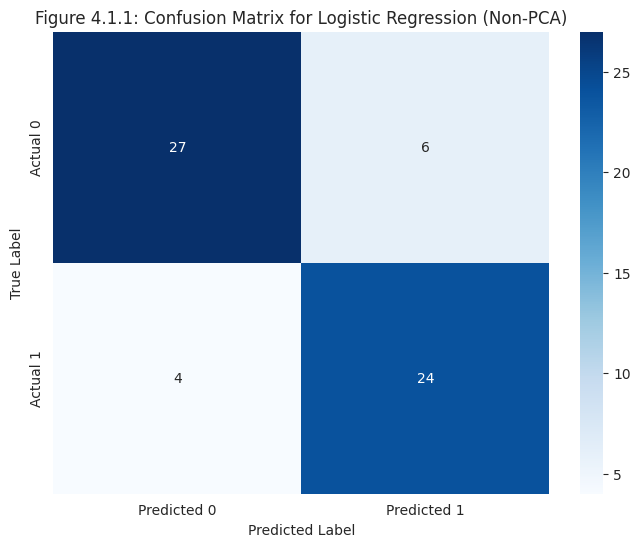

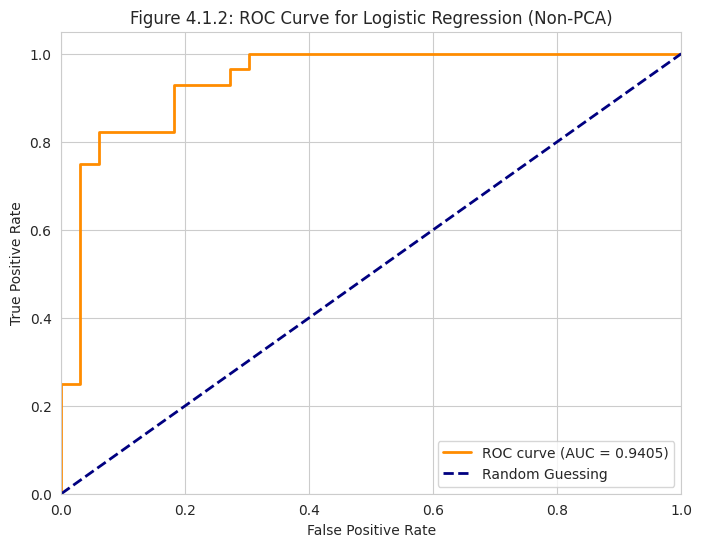

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize the Model
log_reg = LogisticRegression(random_state=42, solver='liblinear')

# 2. Train the Model
log_reg.fit(X_train_scaled, y_train)

# 3. Make Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# 4. Evaluate
print("=== Logistic Regression Results ===")
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy_log:.4f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_log):.4f}")

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 4.1.1: Confusion Matrix for Logistic Regression (Non-PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
roc_auc = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4.1.2: ROC Curve for Logistic Regression (Non-PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 2: K-Nearest Neighbors (KNN)**

=== K-Nearest Neighbors (KNN) Results ===
Accuracy: 0.9180

Confusion Matrix:
[[29  4]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.87      0.96      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

ROC-AUC Score: 0.9518


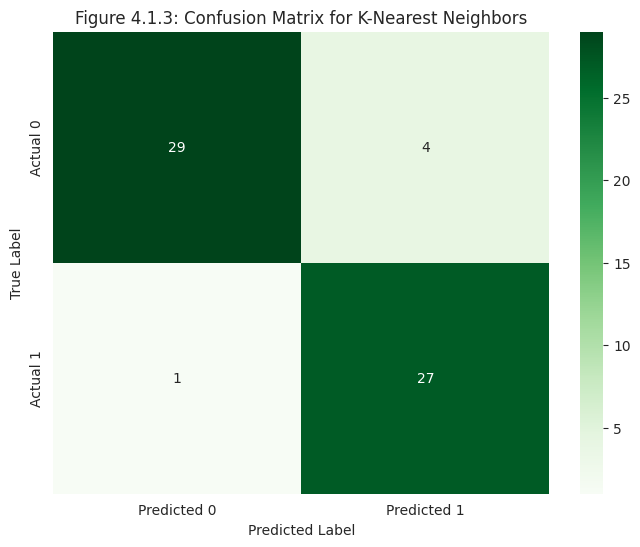

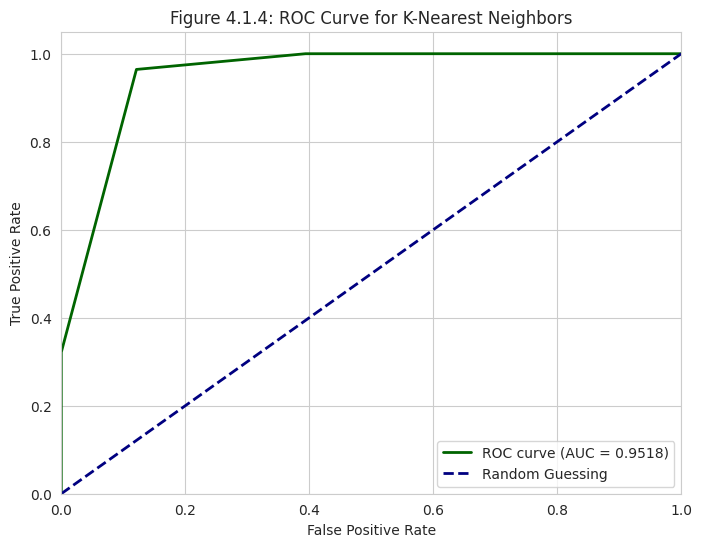

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Initialize the Model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# 2. Train the Model
knn.fit(X_train_scaled, y_train)

# 3. Make Predictions
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

# 4. Evaluate
print("=== K-Nearest Neighbors (KNN) Results ===")
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy_knn:.4f}")

print("\nConfusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_knn):.4f}")

# Figure 4.1.3: Confusion Matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 4.1.3: Confusion Matrix for K-Nearest Neighbors')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 4.1.4: ROC Curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2,
         label=f'ROC curve (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4.1.4: ROC Curve for K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 3: Decision Tree**

=== Decision Tree Results ===
Accuracy: 0.8033

Confusion Matrix:
[[29  4]
 [ 8 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.83      0.71      0.77        28

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

ROC-AUC Score: 0.7965


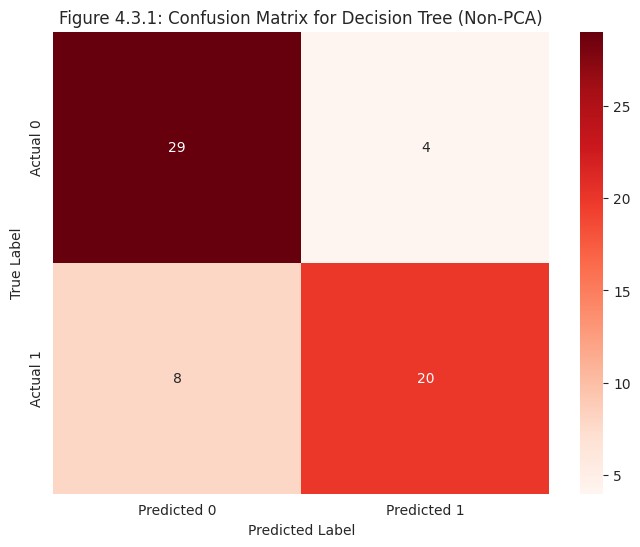

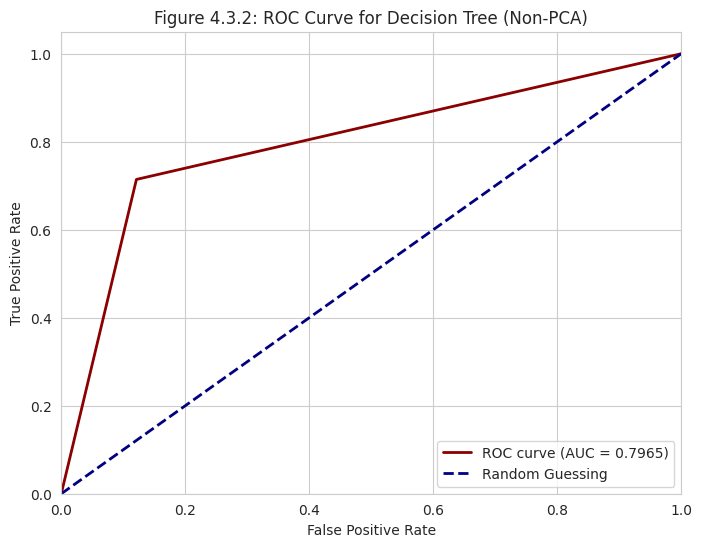

In [16]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize the Model
dt = DecisionTreeClassifier(random_state=42)

# 2. Train the Model
dt.fit(X_train_scaled, y_train)

# 3. Make Predictions
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]

# 4. Evaluate
print("=== Decision Tree Results ===")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")

print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_dt):.4f}")

# Figure 4.3.1: Confusion Matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 4.3.1: Confusion Matrix for Decision Tree (Non-PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 4.3.2: ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkred', lw=2,
         label=f'ROC curve (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4.3.2: ROC Curve for Decision Tree (Non-PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 4: Random Forest**

=== Random Forest Results ===
Accuracy: 0.8689

Confusion Matrix:
[[28  5]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

ROC-AUC Score: 0.9524


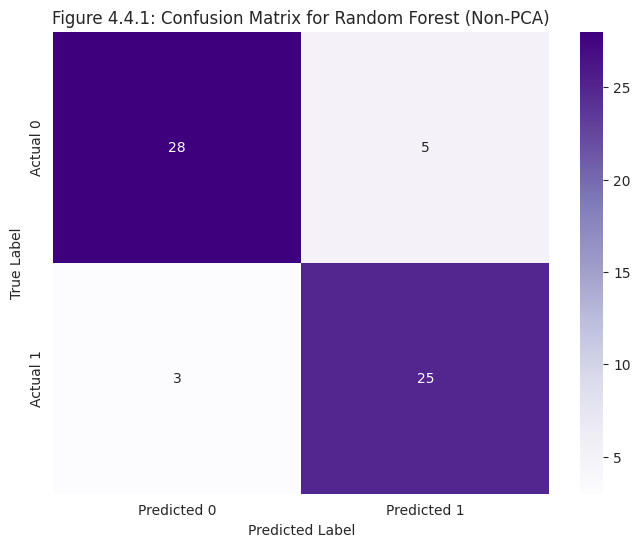

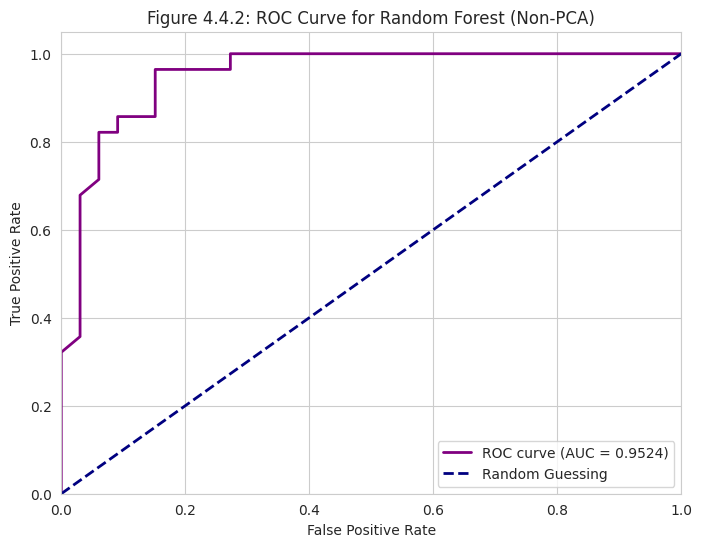

In [17]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the Model
rf.fit(X_train_scaled, y_train)

# 3. Make Predictions
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# 4. Evaluate
print("=== Random Forest Results ===")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_rf):.4f}")

# Figure 4.4.1: Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 4.4.1: Confusion Matrix for Random Forest (Non-PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 4.4.2: ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2,
         label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4.4.2: ROC Curve for Random Forest (Non-PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 5: Artificial Neural Network (ANN)**

=== Artificial Neural Network (ANN) Results ===
Accuracy: 0.8361

Confusion Matrix:
[[27  6]
 [ 4 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

ROC-AUC Score: 0.9080


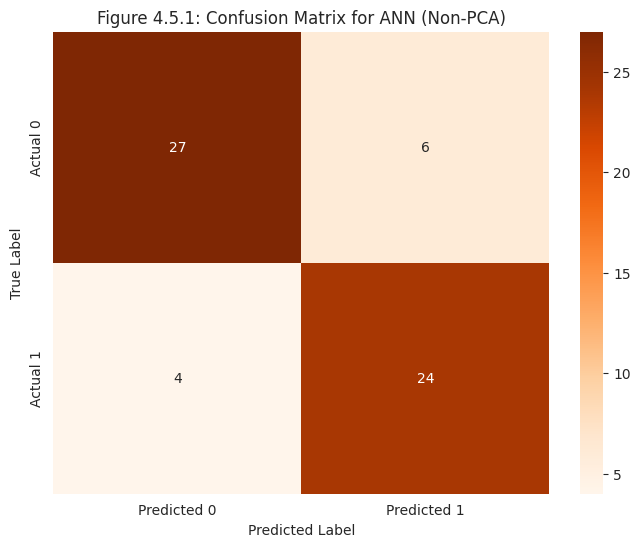

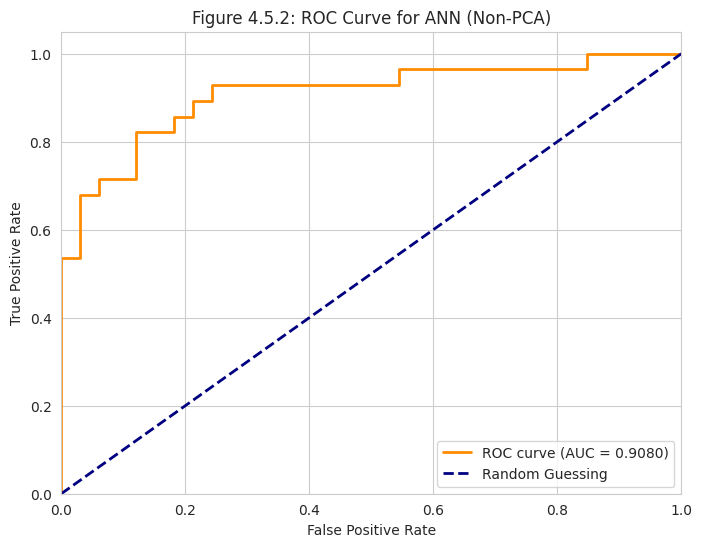

In [18]:
from sklearn.neural_network import MLPClassifier

# 1. Initialize the Model
ann = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam',
                    max_iter=1000, random_state=42)

# 2. Train the Model
ann.fit(X_train_scaled, y_train)

# 3. Make Predictions
y_pred_ann = ann.predict(X_test_scaled)
y_prob_ann = ann.predict_proba(X_test_scaled)[:, 1]

# 4. Evaluate
print("=== Artificial Neural Network (ANN) Results ===")
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f"Accuracy: {accuracy_ann:.4f}")

print("\nConfusion Matrix:")
cm_ann = confusion_matrix(y_test, y_pred_ann)
print(cm_ann)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_ann):.4f}")

# Figure 4.5.1: Confusion Matrix for ANN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 4.5.1: Confusion Matrix for ANN (Non-PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 4.5.2: ROC Curve for ANN
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_prob_ann)
roc_auc_ann = roc_auc_score(y_test, y_prob_ann)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ann, tpr_ann, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc_ann:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 4.5.2: ROC Curve for ANN (Non-PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Training Models After Applying PCA**
---

**PCA Application**

Original Number of Features: 18
Reduced Number of Features (for 95% variance): 15


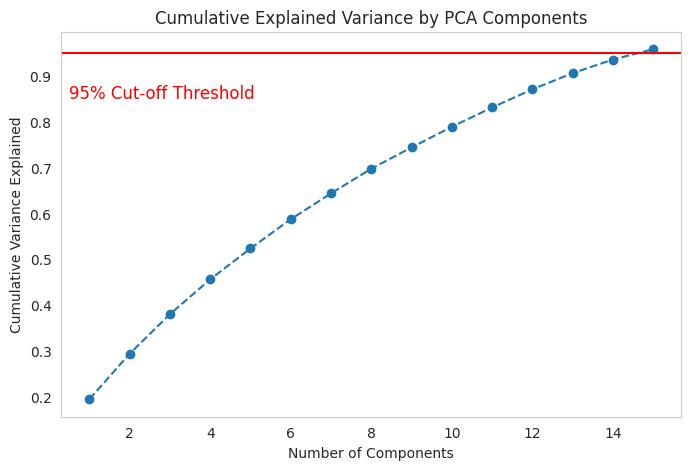

In [19]:
from sklearn.decomposition import PCA

# 1. Initialize PCA
# n_components=0.95 means "Keep enough components to explain 95% of variance"
pca = PCA(n_components=0.95, random_state=42)

# 2. Fit and Transform
# We fit on the SCALED training data
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Report Results
num_components = pca.n_components_
print(f"Original Number of Features: {X_train_scaled.shape[1]}")
print(f"Reduced Number of Features (for 95% variance): {num_components}")

# 4. Visualization (Scree Plot)
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_components + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% Cut-off Threshold', color = 'red', fontsize=12)
plt.grid()
plt.show()

**Model 1: Logistic Regression (With PCA)**

=== Logistic Regression (PCA) Results ===
Accuracy: 0.8361

Confusion Matrix:
[[28  5]
 [ 5 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.82      0.82      0.82        28

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61

ROC-AUC Score: 0.9394


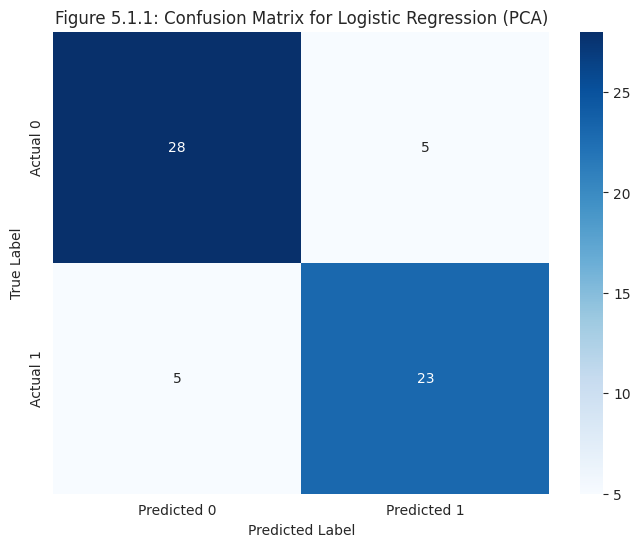

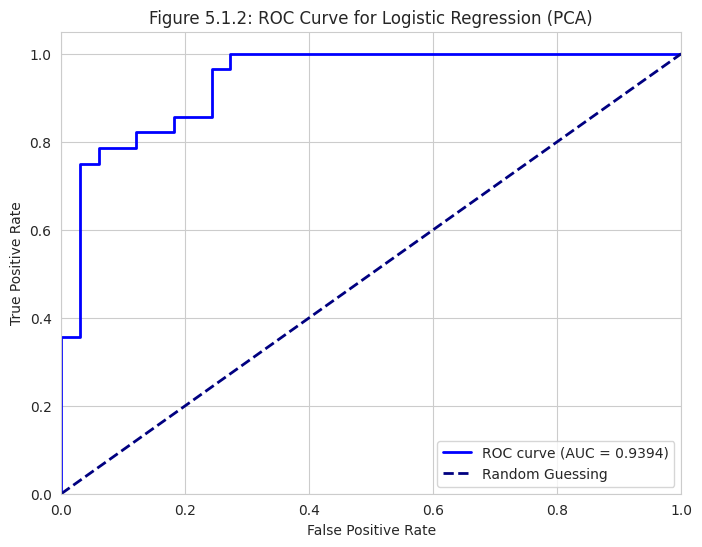

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Initialize the Model
log_reg_pca = LogisticRegression(random_state=42, solver='liblinear')

# 2. Train the Model
log_reg_pca.fit(X_train_pca, y_train)

# 3. Make Predictions
y_pred_log_pca = log_reg_pca.predict(X_test_pca)
y_prob_log_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]

# 4. Evaluate
print("=== Logistic Regression (PCA) Results ===")
accuracy_log_pca = accuracy_score(y_test, y_pred_log_pca)
print(f"Accuracy: {accuracy_log_pca:.4f}")

print("\nConfusion Matrix:")
cm_log_pca = confusion_matrix(y_test, y_pred_log_pca)
print(cm_log_pca)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_pca))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_log_pca):.4f}")

# Figure 5.1.1: Confusion Matrix for Logistic Regression (PCA)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 5.1.1: Confusion Matrix for Logistic Regression (PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 5.1.2: ROC Curve for Logistic Regression (PCA)
fpr_log_pca, tpr_log_pca, _ = roc_curve(y_test, y_prob_log_pca)
roc_auc_log_pca = roc_auc_score(y_test, y_prob_log_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_pca, tpr_log_pca, color='blue', lw=2,
         label=f'ROC curve (AUC = {roc_auc_log_pca:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5.1.2: ROC Curve for Logistic Regression (PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 2: K-Nearest Neighbors (KNN) with PCA**

=== K-Nearest Neighbors (KNN with PCA) Results ===
Accuracy: 0.8525

Confusion Matrix:
[[27  6]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

ROC-AUC Score: 0.9367


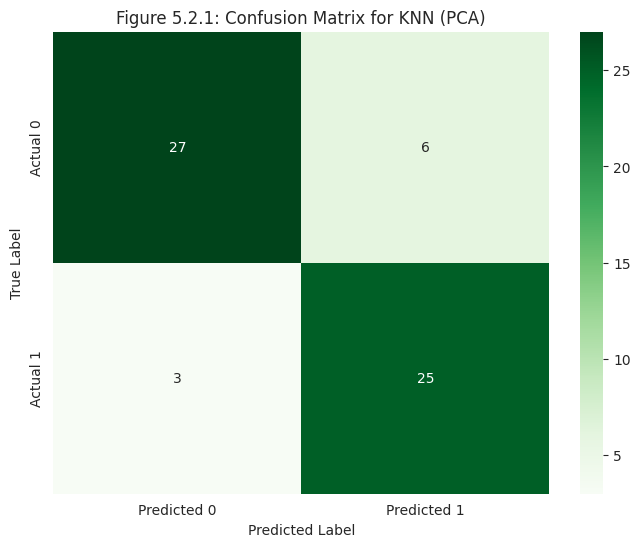

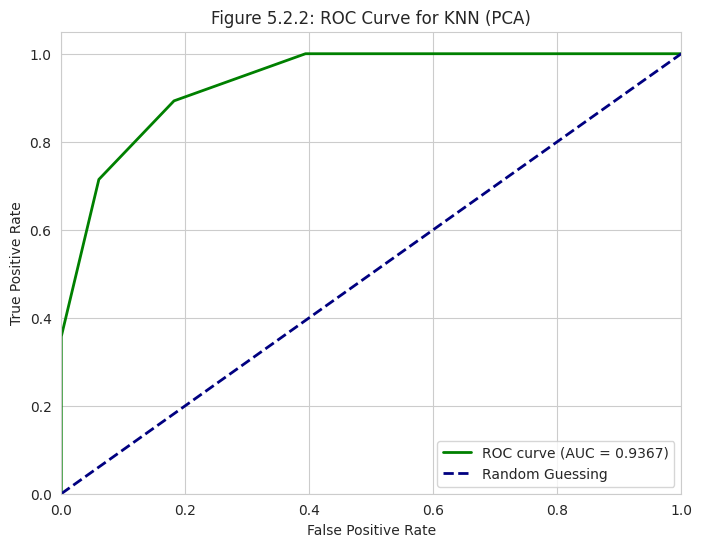

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Initialize the Model
knn_pca = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# 2. Train the Model
knn_pca.fit(X_train_pca, y_train)

# 3. Make Predictions
y_pred_knn_pca = knn_pca.predict(X_test_pca)
y_prob_knn_pca = knn_pca.predict_proba(X_test_pca)[:, 1]

# 4. Evaluate
print("=== K-Nearest Neighbors (KNN with PCA) Results ===")
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
print(f"Accuracy: {accuracy_knn_pca:.4f}")

print("\nConfusion Matrix:")
cm_knn_pca = confusion_matrix(y_test, y_pred_knn_pca)
print(cm_knn_pca)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn_pca))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_knn_pca):.4f}")

# Figure 5.2.1: Confusion Matrix for KNN (PCA)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_pca, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 5.2.1: Confusion Matrix for KNN (PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 5.2.2: ROC Curve for KNN (PCA)
fpr_knn_pca, tpr_knn_pca, _ = roc_curve(y_test, y_prob_knn_pca)
roc_auc_knn_pca = roc_auc_score(y_test, y_prob_knn_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_pca, tpr_knn_pca, color='green', lw=2,
         label=f'ROC curve (AUC = {roc_auc_knn_pca:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5.2.2: ROC Curve for KNN (PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 3: Decision Tree (With PCA)**

=== Decision Tree (PCA) Results ===
Accuracy: 0.7213

Confusion Matrix:
[[24  9]
 [ 8 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        33
           1       0.69      0.71      0.70        28

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

ROC-AUC Score: 0.7208


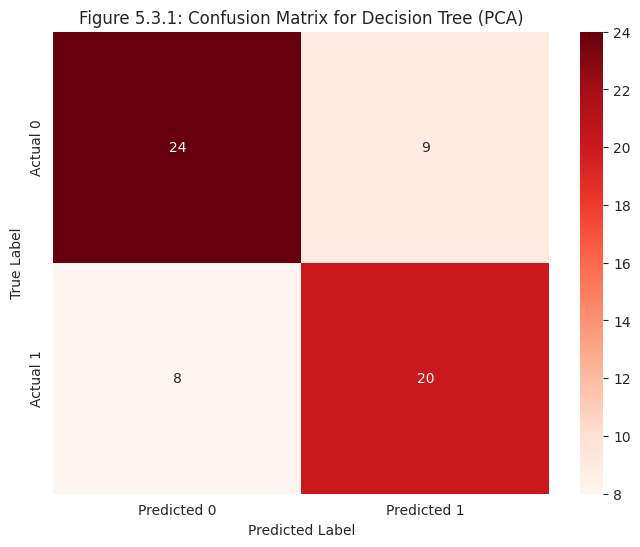

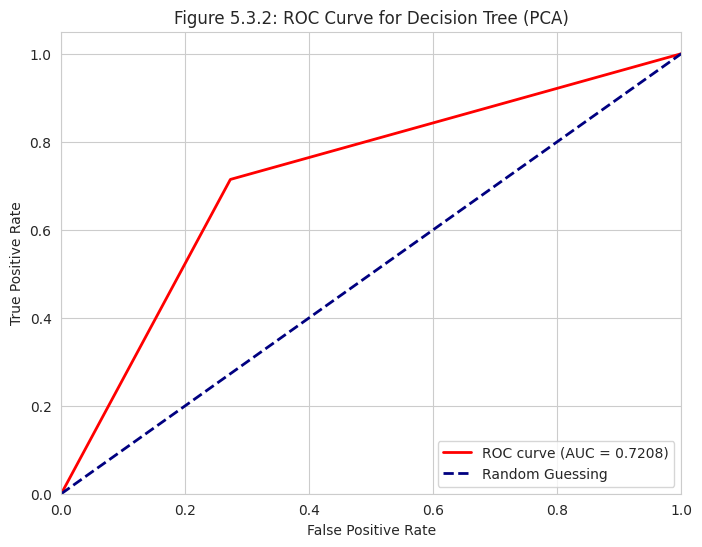

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Initialize the Model
dt_pca = DecisionTreeClassifier(random_state=42)

# 2. Train the Model
dt_pca.fit(X_train_pca, y_train)

# 3. Make Predictions
y_pred_dt_pca = dt_pca.predict(X_test_pca)
y_prob_dt_pca = dt_pca.predict_proba(X_test_pca)[:, 1]

# 4. Evaluate
print("=== Decision Tree (PCA) Results ===")
accuracy_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print(f"Accuracy: {accuracy_dt_pca:.4f}")

print("\nConfusion Matrix:")
cm_dt_pca = confusion_matrix(y_test, y_pred_dt_pca)
print(cm_dt_pca)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt_pca))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_dt_pca):.4f}")

# Figure 5.3.1: Confusion Matrix for Decision Tree (PCA)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_pca, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 5.3.1: Confusion Matrix for Decision Tree (PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 5.3.2: ROC Curve for Decision Tree (PCA)
fpr_dt_pca, tpr_dt_pca, _ = roc_curve(y_test, y_prob_dt_pca)
roc_auc_dt_pca = roc_auc_score(y_test, y_prob_dt_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_pca, tpr_dt_pca, color='red', lw=2,
         label=f'ROC curve (AUC = {roc_auc_dt_pca:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5.3.2: ROC Curve for Decision Tree (PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 4: Random Forest (With PCA)**

=== Random Forest (PCA) Results ===
Accuracy: 0.8197

Confusion Matrix:
[[28  5]
 [ 6 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.81      0.79      0.80        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

ROC-AUC Score: 0.9367


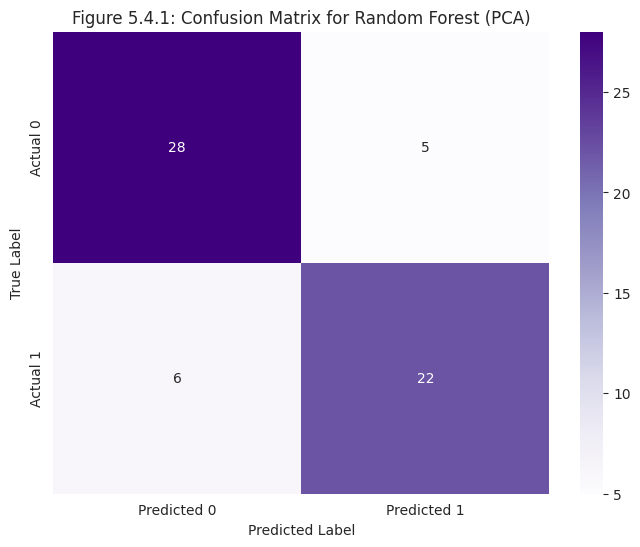

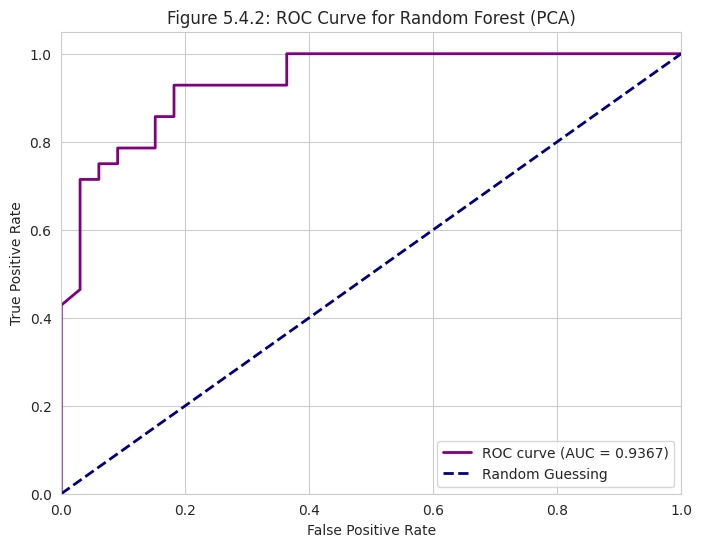

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Initialize the Model
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Train the Model
rf_pca.fit(X_train_pca, y_train)

# 3. Make Predictions
y_pred_rf_pca = rf_pca.predict(X_test_pca)
y_prob_rf_pca = rf_pca.predict_proba(X_test_pca)[:, 1]

# 4. Evaluate
print("=== Random Forest (PCA) Results ===")
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print(f"Accuracy: {accuracy_rf_pca:.4f}")

print("\nConfusion Matrix:")
cm_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)
print(cm_rf_pca)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_pca))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_rf_pca):.4f}")

# Figure 5.4.1: Confusion Matrix for Random Forest (PCA)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_pca, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 5.4.1: Confusion Matrix for Random Forest (PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 5.4.2: ROC Curve for Random Forest (PCA)
fpr_rf_pca, tpr_rf_pca, _ = roc_curve(y_test, y_prob_rf_pca)
roc_auc_rf_pca = roc_auc_score(y_test, y_prob_rf_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_pca, tpr_rf_pca, color='purple', lw=2,
         label=f'ROC curve (AUC = {roc_auc_rf_pca:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5.4.2: ROC Curve for Random Forest (PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Model 5: Artificial Neural Network (ANN) with PCA**

=== Artificial Neural Network (ANN with PCA) Results ===
Accuracy: 0.8852

Confusion Matrix:
[[29  4]
 [ 3 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

ROC-AUC Score: 0.9210


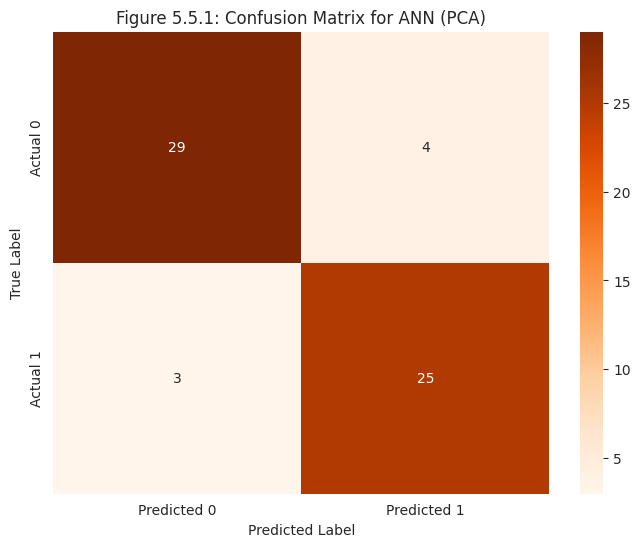

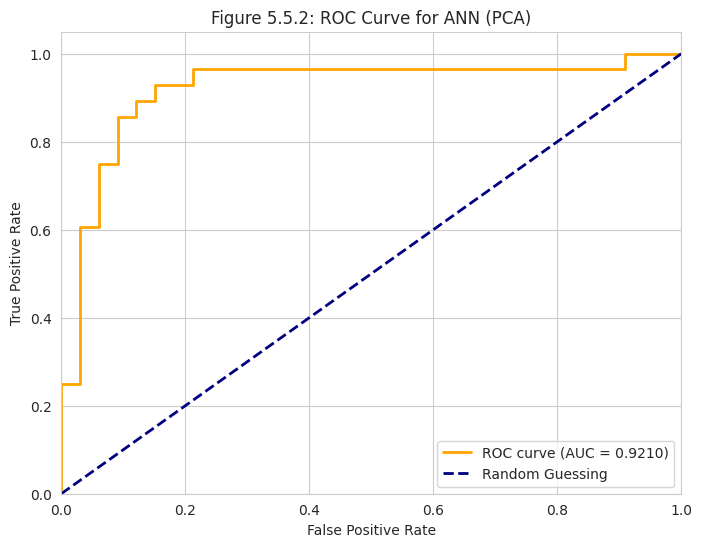

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# 1. Initialize the Model
ann_pca = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam',
                        max_iter=1000, random_state=42)

# 2. Train the Model
ann_pca.fit(X_train_pca, y_train)

# 3. Make Predictions
y_pred_ann_pca = ann_pca.predict(X_test_pca)
y_prob_ann_pca = ann_pca.predict_proba(X_test_pca)[:, 1]

# 4. Evaluate
print("=== Artificial Neural Network (ANN with PCA) Results ===")
accuracy_ann_pca = accuracy_score(y_test, y_pred_ann_pca)
print(f"Accuracy: {accuracy_ann_pca:.4f}")

print("\nConfusion Matrix:")
cm_ann_pca = confusion_matrix(y_test, y_pred_ann_pca)
print(cm_ann_pca)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann_pca))

print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_ann_pca):.4f}")

# Figure 5.5.1: Confusion Matrix for ANN (PCA)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann_pca, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Figure 5.5.1: Confusion Matrix for ANN (PCA)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Figure 5.5.2: ROC Curve for ANN (PCA)
fpr_ann_pca, tpr_ann_pca, _ = roc_curve(y_test, y_prob_ann_pca)
roc_auc_ann_pca = roc_auc_score(y_test, y_prob_ann_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ann_pca, tpr_ann_pca, color='orange', lw=2,
         label=f'ROC curve (AUC = {roc_auc_ann_pca:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 5.5.2: ROC Curve for ANN (PCA)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Final Comparison Table**
---

In [25]:
import pandas as pd

# Data Based on results
results_data = {
    'Model': ['Logistic Regression', 'K-Nearest Neighbors',
              'Decision Tree', 'Random Forest', 'Artificial Neural Network'],
    'Original Accuracy': [0.8361, 0.9180, 0.8033, 0.8689, 0.8361],
    'PCA Accuracy':      [0.8361, 0.8525, 0.7213, 0.8197, 0.8852],
    'Change':            ['No Change', 'Dropped', 'Dropped', 'Dropped', 'IMPROVED']
}

# Create DataFrame
comparison_df = pd.DataFrame(results_data)

# Calculate percentage change for clarity
comparison_df['Diff'] = comparison_df['PCA Accuracy'] - comparison_df['Original Accuracy']

# Display the table
print("=== Final Model Comparison Table ===")
display(comparison_df.style.background_gradient(cmap='RdYlGn', subset=['Original Accuracy', 'PCA Accuracy']))

# Identify the Best Model
best_model_row = comparison_df.loc[comparison_df['Original Accuracy'].idxmax()]
print(f"\n Overall Best Model: {best_model_row['Model']} with {best_model_row['Original Accuracy']:.4f} accuracy.")

=== Final Model Comparison Table ===


,Model,Original Accuracy,PCA Accuracy,Change,Diff
0,Logistic Regression,0.836100,0.836100,No Change,0.000000
1,K-Nearest Neighbors,0.918000,0.852500,Dropped,-0.065500
2,Decision Tree,0.803300,0.721300,Dropped,-0.082000
3,Random Forest,0.868900,0.819700,Dropped,-0.049200
4,Artificial Neural Network,0.836100,0.885200,IMPROVED,0.049100



 Overall Best Model: K-Nearest Neighbors with 0.9180 accuracy.
